<a href="https://colab.research.google.com/github/lassmed/DeepLearning/blob/main/Tp1_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

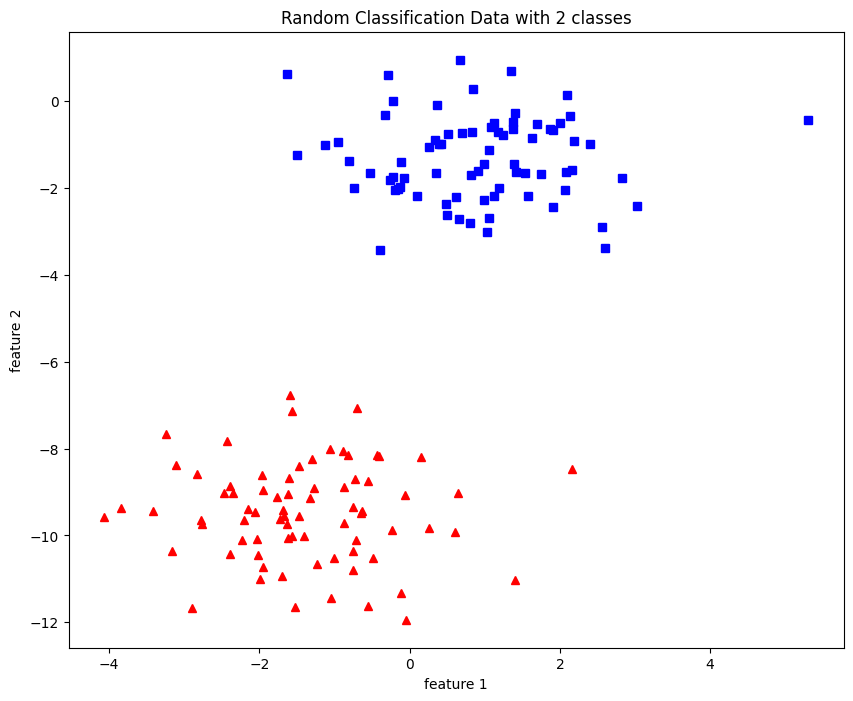

In [62]:
from sklearn import datasets
import matplotlib.pyplot as plt
X, y = datasets.make_blobs (n_samples=150, n_features=2,
 centers=2, cluster_std=1.05,
random_state=2)
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')


In [63]:
def heaviside(x):
    return 1 if x > 0 else 0


In [64]:
x_values = [-2, -1, 0, 1, 2]
for x in x_values:
    print(f"Heaviside({x}) = {heaviside(x)}")


Heaviside(-2) = 0
Heaviside(-1) = 0
Heaviside(0) = 0
Heaviside(1) = 1
Heaviside(2) = 1


In [65]:
import numpy as np
def perceptron(X, y, lr, epochs):
 # X --> Inputs.
 # y --> labels/target.
 # lr --> learning rate.
 # epochs --> Number of iterations.
 # m-> number of training examples
 # n-> number of features
 m, n = X.shape
 # Initializing parameters(theta) to zeros.
 # +1 in n+1 for the bias term.
 w = np.zeros((n+1,1))
 # Empty list to store how many examples were
 # misclassified at every iteration.
 n_miss_list = []
 # Training.
 for epoch in range(epochs):
  # variable to store #misclassified.
  n_miss = 0
  # looping for every example.
  for idx, x_i in enumerate(X):
    # Insering 1 for bias, X0 = 1.
    x_i = np.insert(x_i, 0, 1).reshape(-1,1)
    # Calculating prediction/hypothesis.
    y_hat = heaviside(np.dot(x_i.T, w))
    # Updating if the example is misclassified.
    if (np.squeeze(y_hat) - y[idx]) != 0:
      w += lr * (y[idx] - np.squeeze(y_hat)) * x_i
      # Incrementing by 1.
      n_miss += 1
  # Appending number of misclassified examples at every iteration.
  n_miss_list.append(n_miss)
 return w, n_miss_list

In [66]:
print(f"w , n_miss_list",perceptron(X,y,0.01,3))


w , n_miss_list (array([[0.1       ],
       [0.01488595],
       [0.01693843]]), [14, 0, 0])


In [67]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, w):
    # Extracting weights
    w0, w1, w2 = w[0], w[1], w[2]

    # Calculate slope (m) and intercept (c) of the decision boundary line
    m = -w1 / w2  # slope
    c = -w0 / w2  # intercept

    # Generating x values to plot the decision boundary line
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x1 = np.array([x1_min, x1_max])
    x2 = m * x1 + c


    # Plotting the decision boundary

    X, y = datasets.make_blobs (n_samples=150, n_features=2,
    centers=2, cluster_std=1.05,
    random_state=2)

    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.plot(x1, x2, color='k', linestyle='-', label='Decision Boundary')
    plt.title('Decision Boundary')
    plt.legend()
    plt.show()



Shape of X: (250, 2)
Shape of y: (250,)
Generated Data:
X[0]: [ 1.0455062  -0.06456067], y[0]: 0
X[1]: [1.165903   0.05348949], y[1]: 0
X[2]: [-0.8792514  -0.33483758], y[2]: 1
X[3]: [-1.5868908   0.05540964], y[3]: 1
X[4]: [ 0.69865593 -0.31086061], y[4]: 0
X[5]: [-0.56100052 -0.03539692], y[5]: 1
X[6]: [0.99170413 0.25359664], y[6]: 0
X[7]: [-0.81764683 -0.36446044], y[7]: 1
X[8]: [-1.5063891   0.34635202], y[8]: 1
X[9]: [-0.68436396 -0.0165062 ], y[9]: 1
X[10]: [ 1.33580427 -0.13698352], y[10]: 0
X[11]: [-0.85329276  0.02682649], y[11]: 1
X[12]: [-0.88771149  0.32556188], y[12]: 1
X[13]: [-0.78421371 -0.41745832], y[13]: 1
X[14]: [-0.69904896 -0.43689522], y[14]: 1
X[15]: [-1.17761882  0.07602105], y[15]: 1
X[16]: [-0.84216881  0.00787302], y[16]: 1
X[17]: [-0.85623791  0.05046206], y[17]: 1
X[18]: [-0.94518217  0.3103293 ], y[18]: 1
X[19]: [1.14525866 0.47533   ], y[19]: 0
X[20]: [-0.54567153 -0.17673143], y[20]: 1
X[21]: [ 0.75592613 -0.20014715], y[21]: 0
X[22]: [1.20860512 0.379

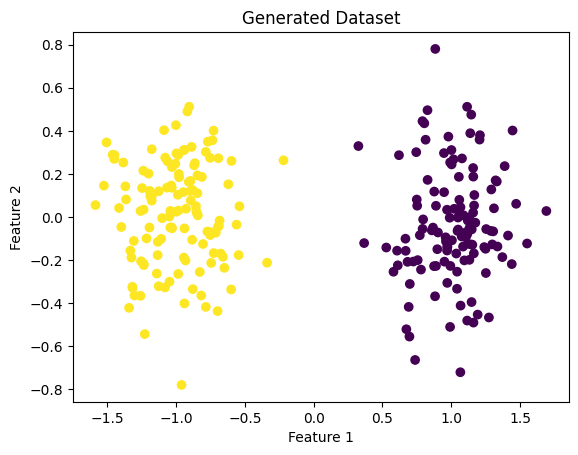

In [68]:
import numpy as np


# Paramètres de la génération de données
n_samples_per_class = 125
n_features = 2
cluster_std = 0.25  # écart-type spécifié
random_state = 2


# Génération des données pour la classe yi = -1
mu1 = np.array([-1, 0])
X1 = np.random.normal(mu1, cluster_std, (n_samples_per_class, n_features))
y1 = np.full((n_samples_per_class,), 1)


# Génération des données pour la classe yi = 0
mu2 = np.array([1, 0])
X2 = np.random.normal(mu2, cluster_std, (n_samples_per_class, n_features))
y2 = np.full((n_samples_per_class,), 0)


# Fusionner les données et les étiquettes
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))


# Mélanger les données
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]


# Affichage des informations sur le dataset généré
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


import matplotlib.pyplot as plt


# Print the generated data
print("Generated Data:")
for i in range(len(X)):
    print(f"X[{i}]: {X[i]}, y[{i}]: {y[i]}")


# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Dataset")
plt.show()

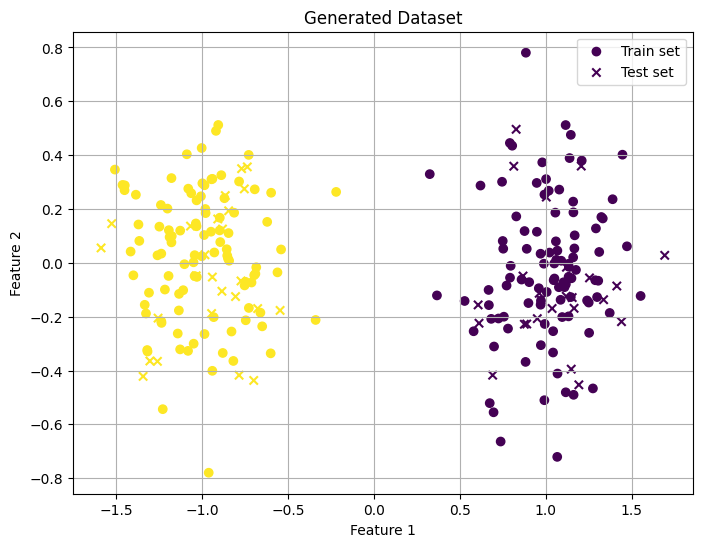

In [69]:
from sklearn.model_selection import train_test_split




# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)


# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Train set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Test set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Dataset')
plt.legend()
plt.grid(True)
plt.show()


In [70]:
print(f"w , n_miss_list",perceptron(X_train,y_train,0.01,10))

w , n_miss_list (array([[ 0.        ],
       [-0.01727296],
       [-0.00190617]]), [2, 0, 0, 0, 0, 0, 0, 0, 0, 0])


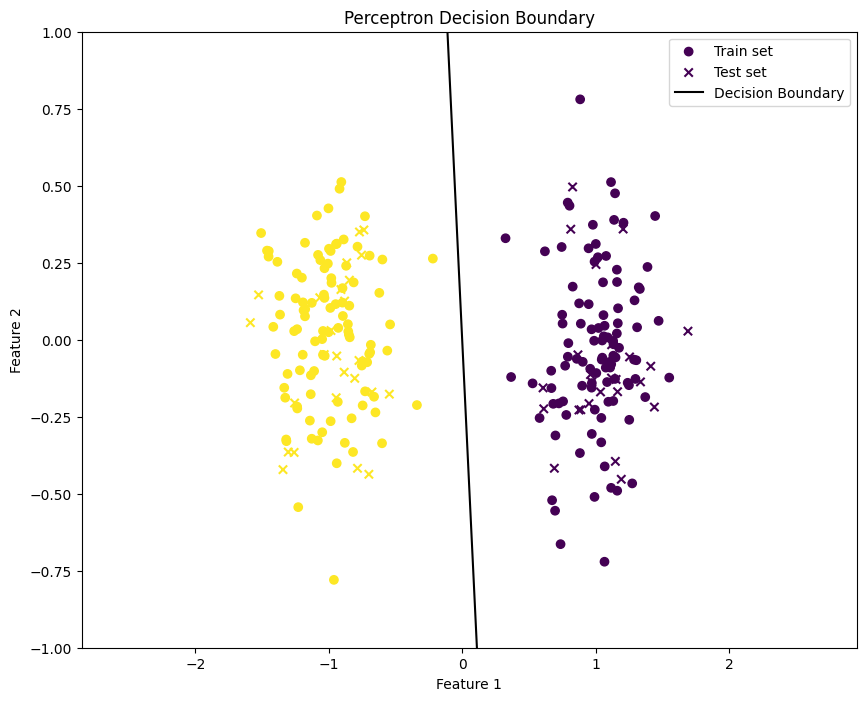

In [74]:
# Train the perceptron
lr = 0.1
epochs = 100
w, n_miss_list = perceptron(X_train, y_train, lr, epochs)


# Corrected plotting function call
plt.figure(figsize=(10,8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Train set', marker='o')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Test set')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x1 = np.array([x1_min, x1_max])
m = -w[1] / w[2]  # slope
c = -w[0] / w[2]  # intercept
x2 = m * x1 + c
plt.plot(x1, x2, 'k-', label='Decision Boundary')
plt.ylim(-1,1)

plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()


Shape of X: (250, 2)
Shape of y: (250,)
Generated Data:
X[0]: [ 1.43027909 -0.37584834], y[0]: 0
X[1]: [-1.35709753  0.0224985 ], y[1]: 1
X[2]: [0.13151358 0.21140533], y[2]: 0
X[3]: [ 1.53043689 -1.01896134], y[3]: 0
X[4]: [0.54942303 0.6816954 ], y[4]: 0
X[5]: [-1.78765861 -0.2366374 ], y[5]: 1
X[6]: [-0.72194688  0.36325393], y[6]: 1
X[7]: [-0.10644589 -0.17407692], y[7]: 1
X[8]: [ 1.14227694 -0.95147377], y[8]: 0
X[9]: [-2.23442822  0.28369815], y[9]: 1
X[10]: [-1.16199334  0.46837427], y[10]: 1
X[11]: [ 0.06843884 -0.24305556], y[11]: 1
X[12]: [ 1.28930509 -0.14029078], y[12]: 0
X[13]: [-1.30689566  0.37686331], y[13]: 1
X[14]: [-1.31707575 -0.71283522], y[14]: 1
X[15]: [0.24622775 0.46556095], y[15]: 0
X[16]: [0.30349278 0.7625982 ], y[16]: 1
X[17]: [1.71111921 0.99519951], y[17]: 0
X[18]: [1.98946401 0.96339826], y[18]: 0
X[19]: [-0.1099393   0.04887855], y[19]: 1
X[20]: [-0.70464828 -0.87329219], y[20]: 1
X[21]: [-0.83746367  1.83801909], y[21]: 1
X[22]: [-0.58444234 -0.9802316

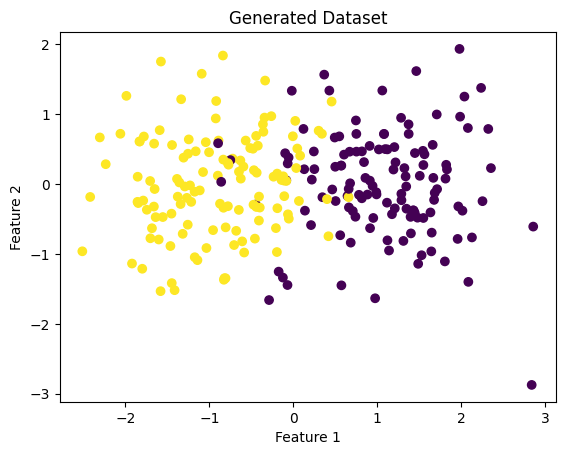

In [75]:
import numpy as np


# Paramètres de la génération de données
n_samples_per_class = 125
n_features = 2
cluster_std = 0.75  # écart-type spécifié
random_state = 2


# Génération des données pour la classe yi = -1
mu1 = np.array([-1, 0])
X1 = np.random.normal(mu1, cluster_std, (n_samples_per_class, n_features))
y1 = np.full((n_samples_per_class,), 1)


# Génération des données pour la classe yi = 0
mu2 = np.array([1, 0])
X2 = np.random.normal(mu2, cluster_std, (n_samples_per_class, n_features))
y2 = np.full((n_samples_per_class,), 0)


# Fusionner les données et les étiquettes
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))


# Mélanger les données
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]


# Affichage des informations sur le dataset généré
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


import matplotlib.pyplot as plt


# Print the generated data
print("Generated Data:")
for i in range(len(X)):
    print(f"X[{i}]: {X[i]}, y[{i}]: {y[i]}")


# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Dataset")
plt.show()

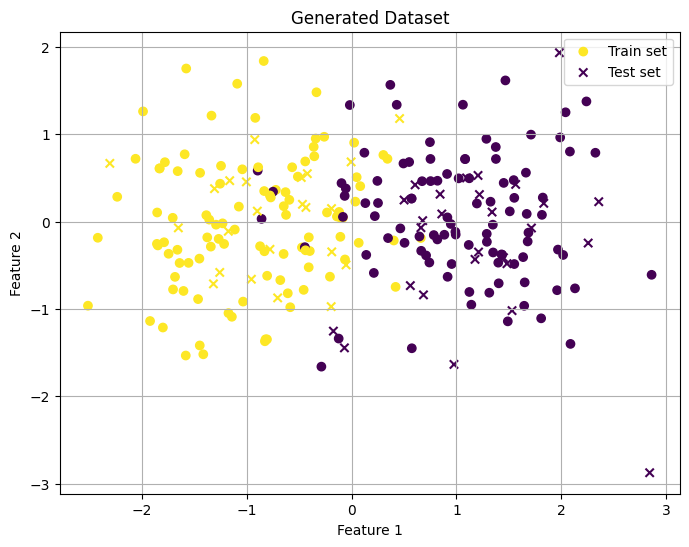

In [76]:
from sklearn.model_selection import train_test_split




# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)


# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Train set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Test set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Dataset')
plt.legend()
plt.grid(True)
plt.show()


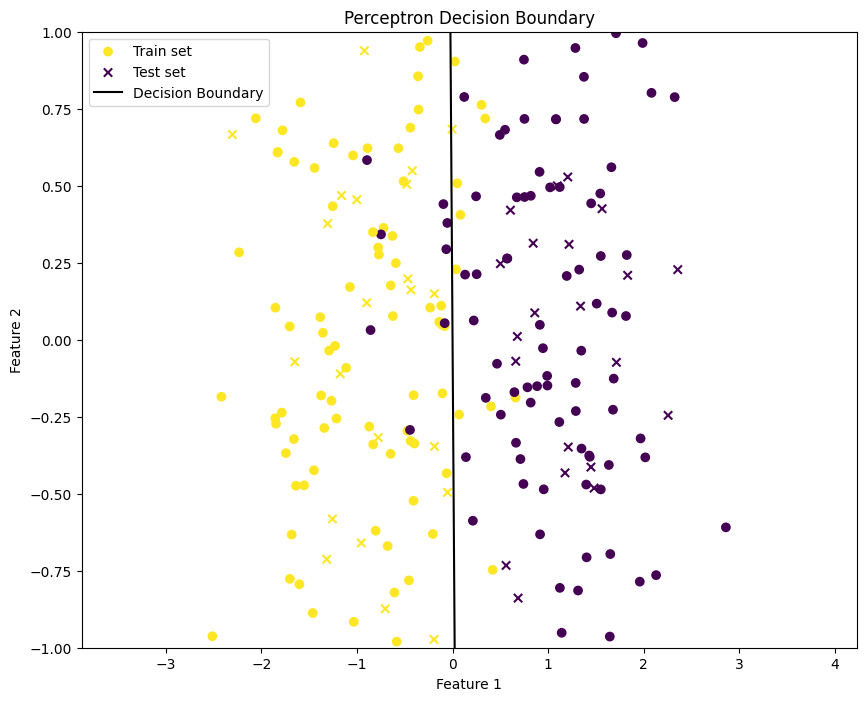

In [77]:
# Train the perceptron
lr = 0.1
epochs = 100
w, n_miss_list = perceptron(X_train, y_train, lr, epochs)


# Corrected plotting function call
plt.figure(figsize=(10,8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Train set', marker='o')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Test set')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x1 = np.array([x1_min, x1_max])
m = -w[1] / w[2]  # slope
c = -w[0] / w[2]  # intercept
x2 = m * x1 + c
plt.plot(x1, x2, 'k-', label='Decision Boundary')
plt.ylim(-1,1)

plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()